## dlbase.utils

In [1]:
import math
from collections import namedtuple
from dlbase.utils.nb import TableDisplay

Log = namedtuple('Log', ['x', 'y', 'z'])
table = TableDisplay(10)
for x in range(0, 20):
    table.log(Log(x, math.sin(x), math.cos(x)))

| x | y | z |
|-|-|-|
| 10 | -0.5440 | -0.8391 |  
| 11 | -1.0000 | 0.0044 |  
| 12 | -0.5366 | 0.8439 |  
| 13 | 0.4202 | 0.9074 |  
| 14 | 0.9906 | 0.1367 |  
| 15 | 0.6503 | -0.7597 |  
| 16 | -0.2879 | -0.9577 |  
| 17 | -0.9614 | -0.2752 |  
| 18 | -0.7510 | 0.6603 |  
| 19 | 0.1499 | 0.9887 |


## dlbase.viz

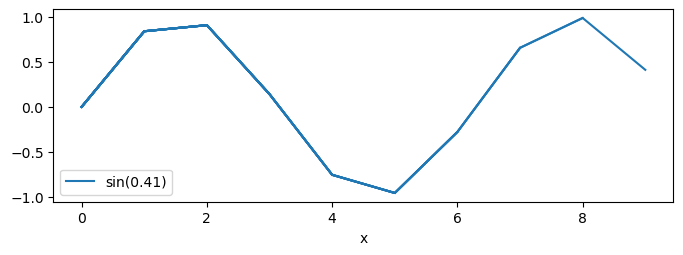

In [3]:
from dlbase.viz.board import ProgressBoard
import math

with ProgressBoard(xlabel='x') as progress_board:
    for x in range(0, 10):
        progress_board.draw(x, math.sin(x), 'sin')


## dlbase.funcs

In [6]:
from dlbase.funcs.avg import EWMA
ewma = EWMA(0.9)
for x in range(0, 10):
    print(ewma(x))


0.0
0.09999999999999998
0.2899999999999999
0.5609999999999999
0.9048999999999999
1.3144099999999999
1.7829689999999998
2.3046721
2.8742048899999997
3.4867844009999995


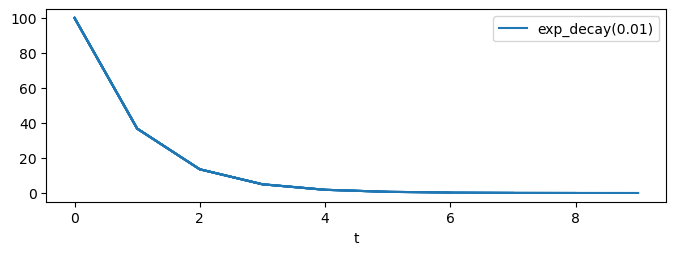

In [2]:
from dlbase.funcs.decay import ExpDecay
from dlbase.viz.board import ProgressBoard
exp_decay = ExpDecay(100, 0, 1)
with ProgressBoard(xlabel='t') as board:
    for t in range(0, 10):
        board.draw(t, exp_decay(t), 'exp_decay')


## dlbase.rl

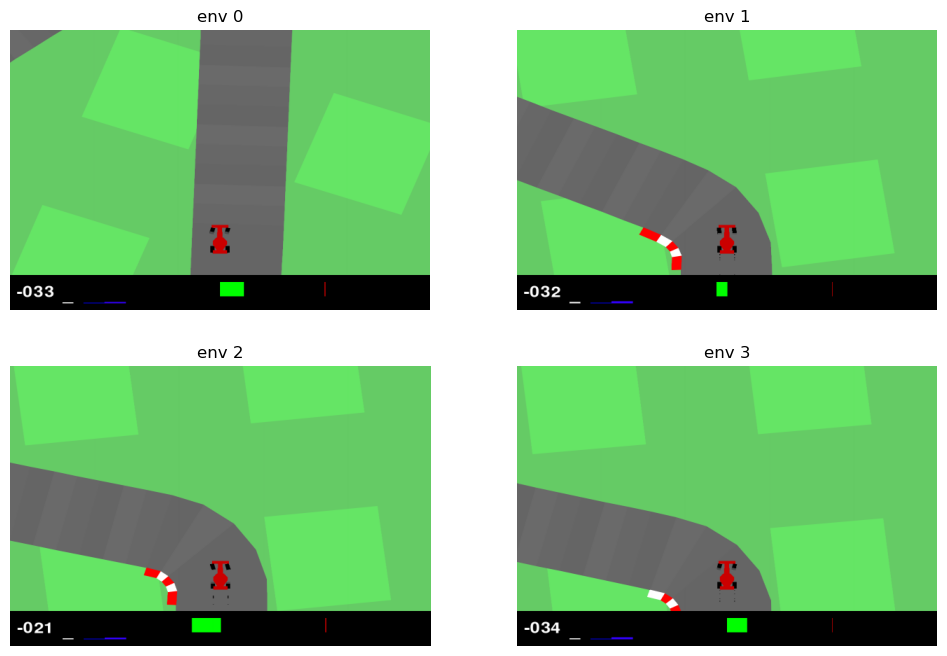

In [1]:
import gymnasium as gym
from dlbase.rl.gym import GymRunner
envs = gym.make_vec('CarRacing-v3', num_envs=4, render_mode='rgb_array')

runner = GymRunner(envs, show_env_freq=10)
runner.run()

In [25]:
from dlbase.utils.tch import cat_namedtuples, cat_dicts
from collections import deque
from typing import NamedTuple
import torch
from torch.utils.data import DataLoader
import numpy as np

q = deque(maxlen=3)
q.append({'a': torch.tensor([1]), 'b': torch.tensor([2])})
q.append({'a': torch.tensor([1]), 'b': torch.tensor([2])})
q.append({'a': torch.tensor([1]), 'b': torch.tensor([2])})
indices = np.random.choice(len(q), 2, replace=False)
(q[i] for i in indices)

class Nt(NamedTuple):
    a: torch.Tensor
    b: torch.Tensor

class Ds:
    def __len__(self):
        return 10
    def __getitem__(self, index):
        return {'a': torch.tensor([1]), 'b': torch.tensor([2])}, Nt(torch.tensor([3]), torch.tensor([4]))

ds = Ds()
dl = DataLoader(ds, batch_size=2)
for batch in dl:
    print(batch)
    break

dict((('c',1), ('b',2)))


[{'a': tensor([[1],
        [1]]), 'b': tensor([[2],
        [2]])}, Nt(a=tensor([[3],
        [3]]), b=tensor([[4],
        [4]]))]


{'c': 1, 'b': 2}